# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
df = df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])][['Sentence', 'Sentiment']].dropna().reset_index(drop=True)
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
import re
stopwords = set("""i me my myself we our ours ourselves you your yours yourself yourselves he him
his himself she her hers herself it its itself they them their theirs themselves
what which who whom this that these those am is are was were be been being have
has had having do does did doing a an the and but if or because as until while
of at by for with about against between into through during before after above
below to from up down in out on off over under again further then once here
there when where why how all any both each few more most other some such no nor
not only own same so than too very s t can will just don should now""".split())

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", "", text)
    return " ".join([word for word in text.split() if word not in stopwords])

df['clean'] = df['Sentence'].apply(clean_text)

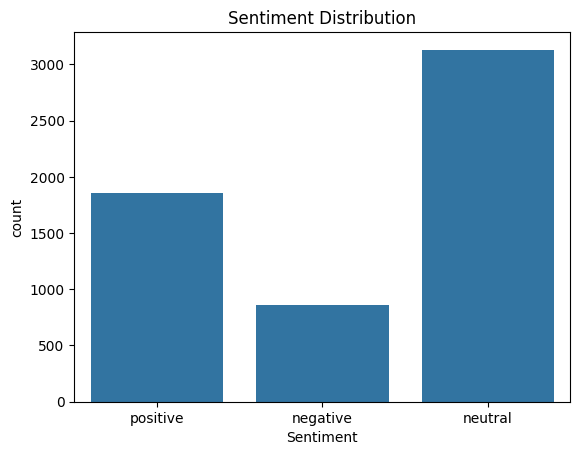

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

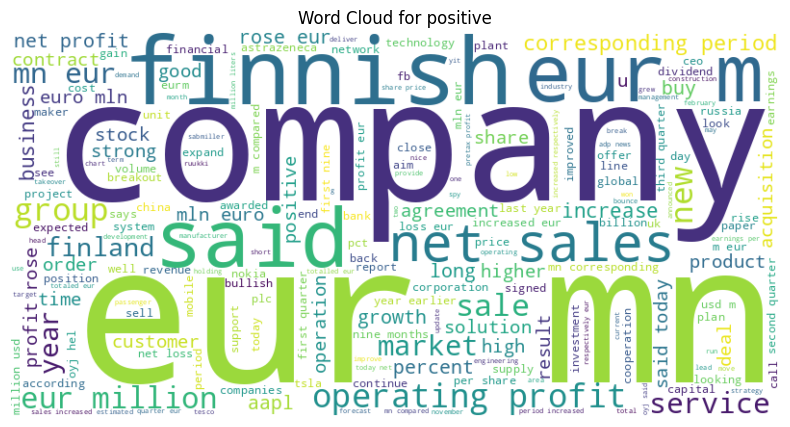

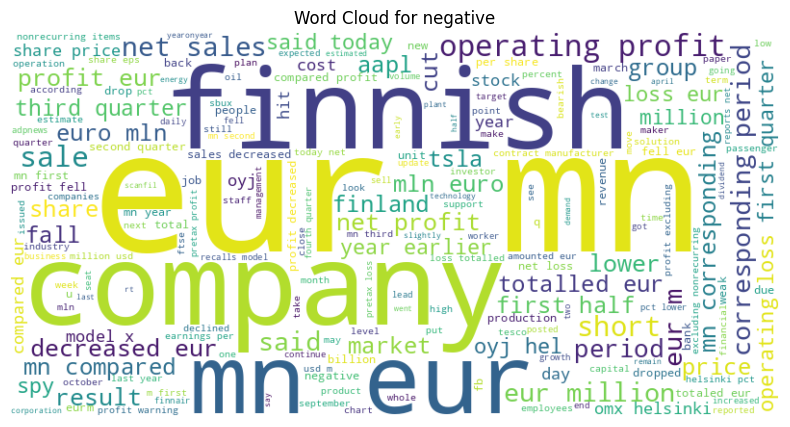

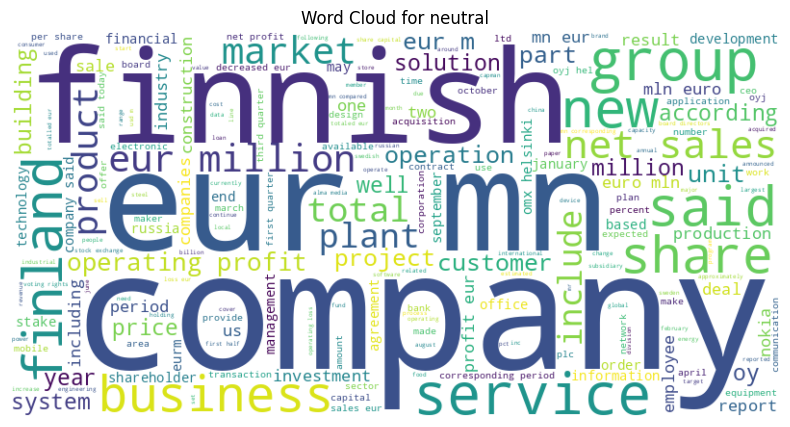

In [ ]:
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['clean'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment}")
    plt.show()

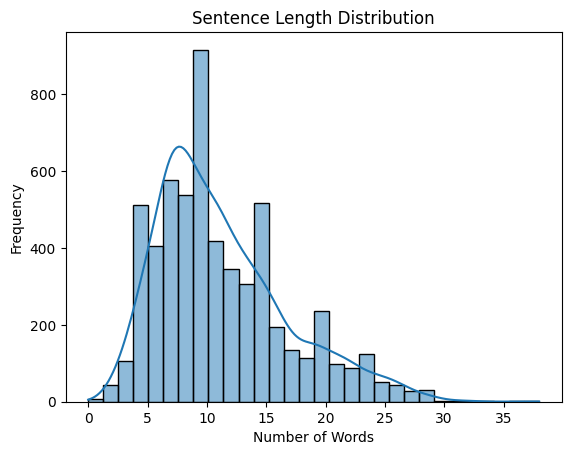

In [ ]:
df['length'] = df['clean'].apply(lambda x: len(x.split()))
sns.histplot(df['length'], bins=30, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.10      0.17       175
           1       0.69      0.94      0.80       622
           2       0.72      0.58      0.65       372

    accuracy                           0.70      1169
   macro avg       0.66      0.54      0.54      1169
weighted avg       0.68      0.70      0.65      1169

Confusion Matrix:
[[ 17 109  49]
 [  5 583  34]
 [  8 147 217]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.22      0.26       175
           1       0.73      0.80      0.76       622
           2       0.74      0.72      0.73       372

    accuracy                           0.69      1169
   macro avg       0.60      0.58      0.59      1169
weighted avg       0.67      0.69      0.68      1169

Confusion Matrix:
[[ 39 100  36]
 [ 68 498  56]
 [ 16  88 268]]
Logistic Regression Classification Report:
     

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
!pip install scikit-learn transformers datasets wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    labels, texts = [], []
    for line in lines:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            labels.append(int(parts[0]))
            texts.append(parts[1])
    return pd.DataFrame({'label': labels, 'text': texts})

train_df = load_data("stsa-train.txt")
test_df = load_data("stsa-test.txt")
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

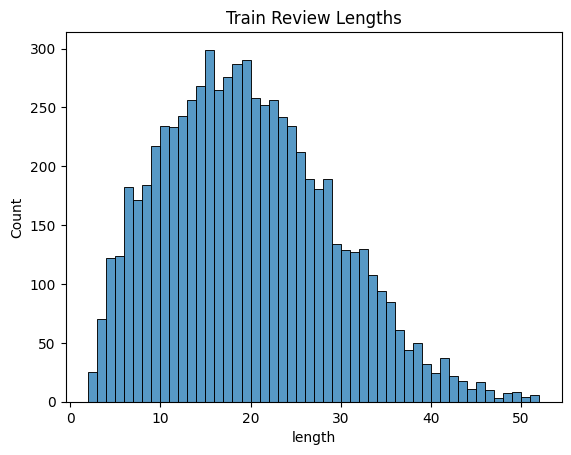

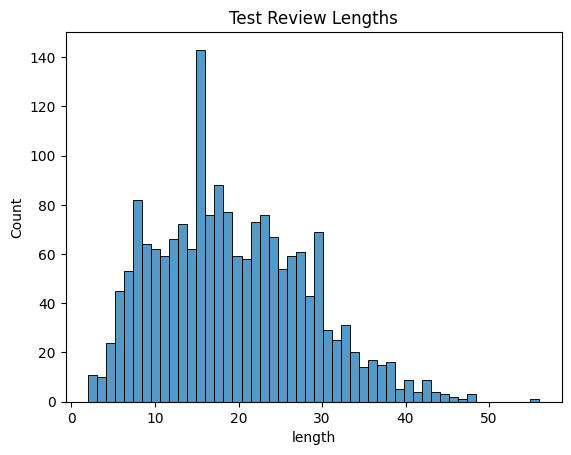

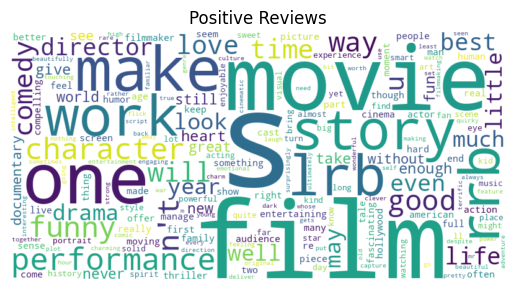

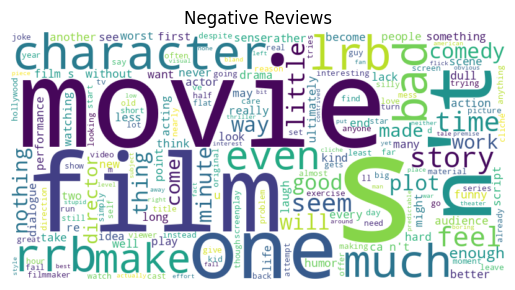

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['length'] = test_df['text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['length'], bins=50)
plt.title("Train Review Lengths")
plt.show()

sns.histplot(test_df['length'], bins=50)
plt.title("Test Review Lengths")
plt.show()
def wordcloud(df, label, title):
    text = " ".join(df[df['label'] == label]['text'].tolist())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

wordcloud(train_df, 1, "Positive Reviews")
wordcloud(train_df, 0, "Negative Reviews")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

def evaluate_model(name, model):
    pipe = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        ('tfidf', TfidfTransformer()),
        ('clf', model)
    ])
    print(f"\n{name} - 10-Fold Cross Validation Accuracy:")
    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
    print("Mean Accuracy:", np.mean(scores))

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(test_df['text'])

    print(f"Test Set Evaluation for {name}:")
    print(metrics.classification_report(test_df['label'], y_pred, digits=4))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

evaluate_model("KNN", KNeighborsClassifier(n_neighbors=5))
evaluate_model("Decision Tree", DecisionTreeClassifier())
evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100))


KNN - 10-Fold Cross Validation Accuracy:
Mean Accuracy: 0.5180662092557171
Test Set Evaluation for KNN:
              precision    recall  f1-score   support

           0     0.5490    0.3564    0.4322       912
           1     0.5224    0.7063    0.6006       909

    accuracy                         0.5310      1821
   macro avg     0.5357    0.5313    0.5164      1821
weighted avg     0.5357    0.5310    0.5162      1821


Decision Tree - 10-Fold Cross Validation Accuracy:
Mean Accuracy: 0.6387299991513308
Test Set Evaluation for Decision Tree:
              precision    recall  f1-score   support

           0     0.6739    0.6096    0.6402       912
           1     0.6426    0.7041    0.6719       909

    accuracy                         0.6568      1821
   macro avg     0.6583    0.6569    0.6561      1821
weighted avg     0.6583    0.6568    0.6560      1821


Random Forest - 10-Fold Cross Validation Accuracy:
Mean Accuracy: 0.7080956515494742
Test Set Evaluation for Random

In [ ]:
from datasets import Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

hf_train = Dataset.from_pandas(train_df)
hf_test = Dataset.from_pandas(test_df)
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch['text'], truncation=True)

hf_train = hf_train.map(tokenize, batched=True)
hf_test = hf_test.map(tokenize, batched=True)
hf_train.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
hf_test.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/6920 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./bert_results",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_train,
    eval_dataset=hf_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()
trainer.evaluate()

<ipython-input-16-98a3fad31194>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.244994,0.897858,0.903010,0.891089,0.897010
2,0.306400,0.271090,0.922570,0.917391,0.928493,0.922909


{'eval_loss': 0.2710898220539093,
 'eval_accuracy': 0.9225700164744646,
 'eval_precision': 0.9173913043478261,
 'eval_recall': 0.9284928492849285,
 'eval_f1': 0.9229086932750137,
 'eval_runtime': 276.8825,
 'eval_samples_per_second': 6.577,
 'eval_steps_per_second': 0.412,
 'epoch': 2.0}

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sentence_transformers import SentenceTransformer

nltk.download('stopwords')
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


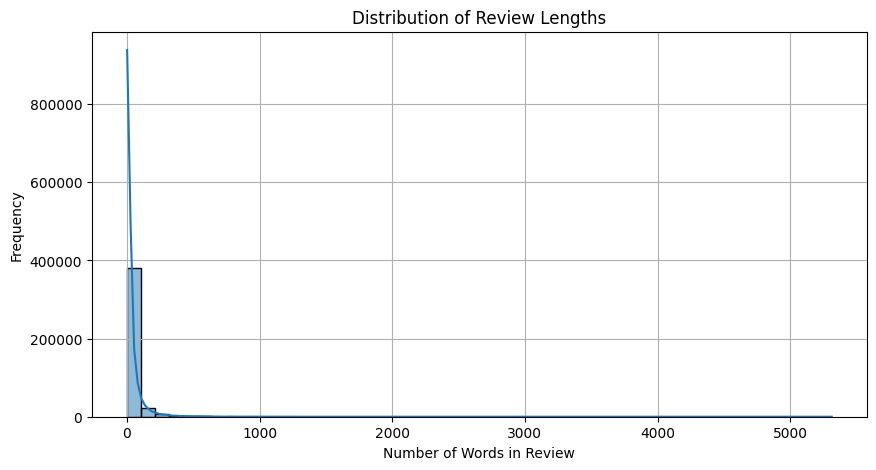

In [ ]:
df_clean = df.dropna(subset=["Reviews"]).copy()
df_clean["Review Length"] = df_clean["Reviews"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df_clean["Review Length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df_clean["cleaned_reviews"] = df_clean["Reviews"].apply(preprocess)
df_clean = df_clean[df_clean["cleaned_reviews"].str.strip().astype(bool)]
df_clean = df_clean.sample(n=3000, random_state=42).reset_index(drop=True)

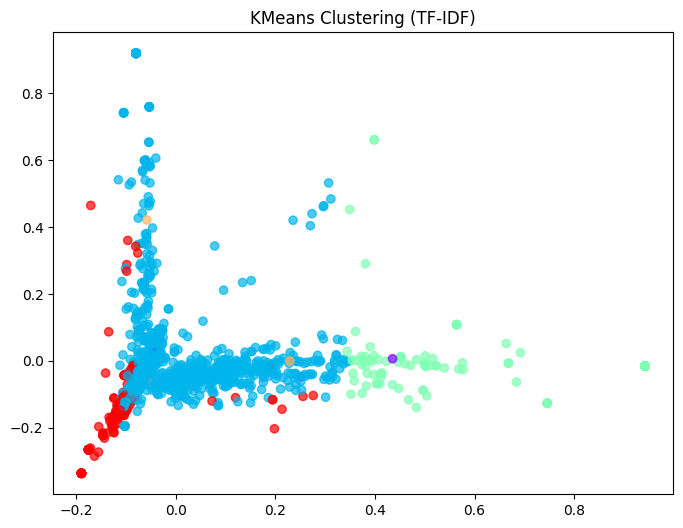

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df_clean["cleaned_reviews"])

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.7)
plt.title("KMeans Clustering (TF-IDF)")
plt.show()

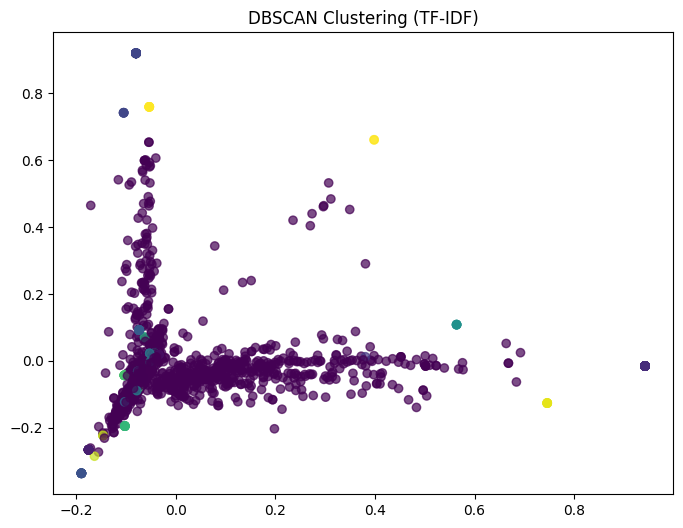

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tfidf)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title("DBSCAN Clustering (TF-IDF)")
plt.show()

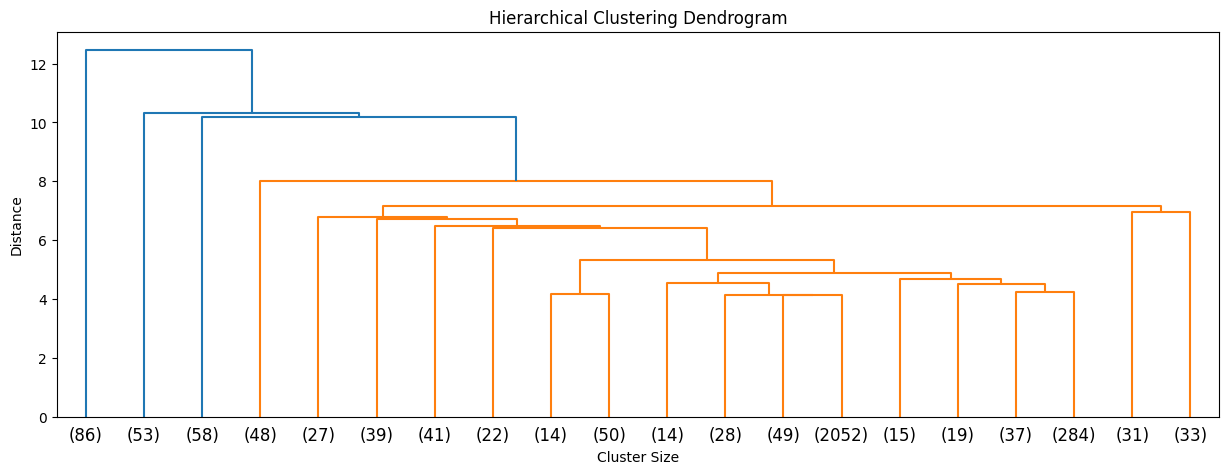

In [ ]:
linkage_matrix = linkage(X_tfidf.toarray(), method='ward')

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

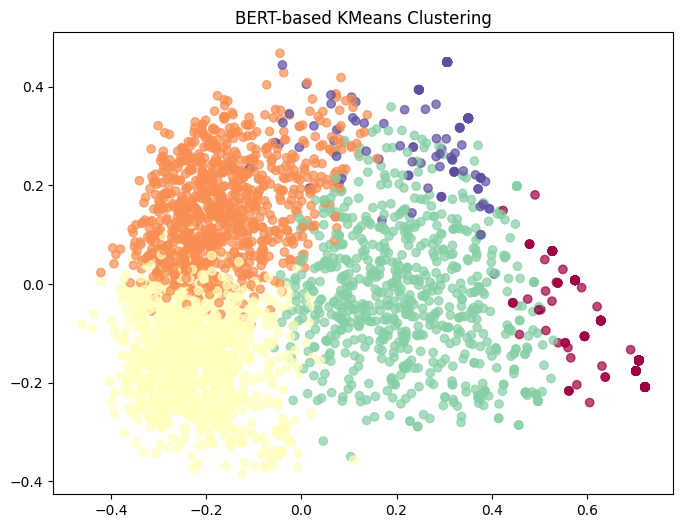

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
X_bert = model.encode(df_clean["cleaned_reviews"], show_progress_bar=True)

pca_bert = PCA(n_components=2)
X_bert_pca = pca_bert.fit_transform(X_bert)

kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(X_bert)

plt.figure(figsize=(8,6))
plt.scatter(X_bert_pca[:, 0], X_bert_pca[:, 1], c=bert_labels, cmap='Spectral', alpha=0.7)
plt.title("BERT-based KMeans Clustering")
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT are all techniques used for grouping or understanding data, but they differ significantly in approach and application. K-means is a centroid-based algorithm that works well on spherical clusters but struggles with irregular shapes or noise. DBSCAN, in contrast, is density-based and excels at identifying clusters of arbitrary shape and handling outliers, though it can be sensitive to parameter selection. Hierarchical clustering builds nested clusters using a bottom-up or top-down approach and offers a dendrogram for visual interpretation, but it can be computationally intensive for large datasets. Word2Vec is a neural network-based model designed specifically for capturing semantic relationships between words in vector space, enabling clustering of similar terms based on context. BERT, a transformer-based model, goes a step further by understanding deep contextual meaning in text, offering superior performance in complex natural language processing tasks. While K-means, DBSCAN, and hierarchical clustering are general-purpose clustering methods, Word2Vec and BERT are specialized for text data, with BERT providing the most advanced language understanding.

# Mandatory Question

Important: Reflective Feedback on this exercise

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

(Your submission will not be graded if this question is left unanswered)
